In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results/"

In [3]:
# indir_db_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
# with sql.connect(indir_db_MC) as con:
#         query = f"""
#         SELECT
#             event_no, interaction_type, pid
#         FROM 
#             truth
#         """
#         MC_interaction_type = read_sql(query,con)

outdir_interaction_type = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
MC_interaction_type = pd.read_csv(outdir_interaction_type + 'interaction_type_New_muon_test.csv')

In [4]:
#indir_multiclass_old = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/dynedge_pid_classification3_test/results.csv"
indir_multiclass = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/pid_Multiclass_try_2_on_test_new_muon.csv"
indir_track_cascade = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_energy = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
indir_zenith = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/zenith_New_muon_test_set.csv"
indir_azimuth = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/azimuth_New_muon_test_set.csv"
indir_positions = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/position_vertex_new_muon.csv"



In [5]:
#multiclass_old = pd.read_csv(indir_multiclass_old).sort_values('event_no').reset_index(drop = True)
multiclass = pd.read_csv(indir_multiclass).reset_index(drop = True)
track_cascade = pd.read_csv(indir_track_cascade).reset_index(drop = True)
energy = pd.read_csv(indir_energy).reset_index(drop = True)
zenith = pd.read_csv(indir_zenith).reset_index(drop = True)
azimuth = pd.read_csv(indir_azimuth).reset_index(drop = True)
position = pd.read_csv(indir_positions).reset_index(drop = True)

In [6]:
neutrino_event_nos = multiclass['event_no'][multiclass['pid'].isin((-12,12,-14,14,-16,16))]

energy = energy[energy['event_no'].isin(neutrino_event_nos.to_list())]
track_cascade = track_cascade[track_cascade['event_no'].isin(neutrino_event_nos.to_list())]
zenith = zenith[zenith['event_no'].isin(neutrino_event_nos.to_list())]
azimuth = azimuth[azimuth['event_no'].isin(neutrino_event_nos.to_list())]
position = position[position['event_no'].isin(neutrino_event_nos.to_list())]

In [7]:
print(multiclass.head(10))

   Unnamed: 0  pid_noise_pred  pid_muon_pred  pid_neutrino_pred   pid  \
0           0    3.167189e-07   1.808391e-05           0.999982  14.0   
1           1    6.963044e-05   1.345782e-03           0.998585  16.0   
2           2    4.059471e-06   6.103072e-06           0.999990  14.0   
3           3    4.747615e-09   5.609261e-05           0.999944  14.0   
4           4    1.015319e-18   1.102018e-06           0.999999  14.0   
5           5    8.258638e-07   7.286674e-01           0.271332  14.0   
6           6    5.459534e-14   4.339114e-08           1.000000  14.0   
7           7    6.001108e-06   4.482271e-05           0.999949  16.0   
8           8    1.337068e-08   4.342528e-06           0.999996  16.0   
9           9    1.637949e-18   5.777264e-09           1.000000  12.0   

     event_no  
0  21794140.0  
1   6635665.0  
2  24365311.0  
3  11910373.0  
4  12728493.0  
5  10043326.0  
6  19994900.0  
7   7447739.0  
8   3776770.0  
9  12668080.0  


In [8]:
print(multiclass.head(10))
multiclass_electron_neutrinos = multiclass[multiclass['pid'].isin((12,-12))]
multiclass_muon_neutrinos = multiclass[multiclass['pid'].isin((14,-14))]
multiclass_tau_neutrinos = multiclass[multiclass['pid'].isin((16,-16))]
multiclass_muons = multiclass[multiclass['pid'].isin((13,-13))]
multiclass_noise = multiclass[multiclass['pid'].isin((1,-1))]


multiclass_equal_comparison_list = []
multiclass_equal_comparison_list.extend(multiclass_electron_neutrinos['event_no'].to_list()[:int(169373/3)])
multiclass_equal_comparison_list.extend(multiclass_muon_neutrinos['event_no'].to_list()[:int(169373/3)])
multiclass_equal_comparison_list.extend(multiclass_tau_neutrinos['event_no'].to_list()[:int(169373/3)])
multiclass_equal_comparison_list.extend(multiclass_noise['event_no'].to_list()[:169373])
multiclass_equal_comparison_list.extend(multiclass_muons['event_no'].to_list()[:169373])
multiclass_equal_comparison = multiclass[multiclass['event_no'].isin(multiclass_equal_comparison_list)]

   Unnamed: 0  pid_noise_pred  pid_muon_pred  pid_neutrino_pred   pid  \
0           0    3.167189e-07   1.808391e-05           0.999982  14.0   
1           1    6.963044e-05   1.345782e-03           0.998585  16.0   
2           2    4.059471e-06   6.103072e-06           0.999990  14.0   
3           3    4.747615e-09   5.609261e-05           0.999944  14.0   
4           4    1.015319e-18   1.102018e-06           0.999999  14.0   
5           5    8.258638e-07   7.286674e-01           0.271332  14.0   
6           6    5.459534e-14   4.339114e-08           1.000000  14.0   
7           7    6.001108e-06   4.482271e-05           0.999949  16.0   
8           8    1.337068e-08   4.342528e-06           0.999996  16.0   
9           9    1.637949e-18   5.777264e-09           1.000000  12.0   

     event_no  
0  21794140.0  
1   6635665.0  
2  24365311.0  
3  11910373.0  
4  12728493.0  
5  10043326.0  
6  19994900.0  
7   7447739.0  
8   3776770.0  
9  12668080.0  


In [9]:
#print(np.shape(multiclass_old))
print(np.shape(multiclass))
print(np.shape(multiclass_equal_comparison))
print(np.shape(track_cascade))
print(np.shape(energy))
print(np.shape(zenith))
print(np.shape(azimuth))
print(np.shape(MC_interaction_type))
print(np.shape(position))

(37235782, 6)
(508117, 6)
(36744942, 5)
(36744942, 4)
(36744942, 4)
(36744942, 4)
(38885781, 3)
(36744942, 8)


In [10]:
#print(results.head(10))
#Noise = 0, muon =1, Neutrino=2
pid_transform = {1:0,12:2,13:1,14:2,16:2}

predictions = []
truth = []


number = len(multiclass_equal_comparison)

for i in range(number):# range(len(results)):
    noise_pred = multiclass_equal_comparison['pid_noise_pred'].values[i]
    muon_pred = multiclass_equal_comparison['pid_muon_pred'].values[i]
    neutrino_pred = multiclass_equal_comparison['pid_neutrino_pred'].values[i]
    predictions.append(np.argmax([noise_pred,muon_pred,neutrino_pred]))

    truth.append(pid_transform[abs(multiclass_equal_comparison['pid'].values[i])])


confusion_matrix = metrics.confusion_matrix(truth, predictions)

mask_noise = [True if truth[i] ==0 else False for i in range(len(truth))]
mask_muon = [True if truth[i] ==1 else False for i in range(len(truth))]
mask_neutrino = [True if truth[i] ==2 else False for i in range(len(truth))]


fpr_neutrino, tpr_neutrino , _ = metrics.roc_curve(truth,multiclass_equal_comparison['pid_neutrino_pred'].values,pos_label=2)
fpr_muon, tpr_muon , _ = metrics.roc_curve(truth,multiclass_equal_comparison['pid_muon_pred'].values,pos_label=1)
fpr_noise, tpr_noise , _ = metrics.roc_curve(truth,multiclass_equal_comparison['pid_noise_pred'].values,pos_label=0)

auc_neutrino = metrics.auc(fpr_neutrino, tpr_neutrino)
auc_muon = metrics.auc(fpr_muon, tpr_muon)
auc_noise = metrics.auc(fpr_noise, tpr_noise)



/tmp/ipykernel_42588/613557110.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


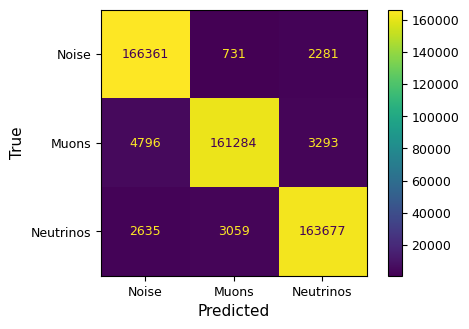

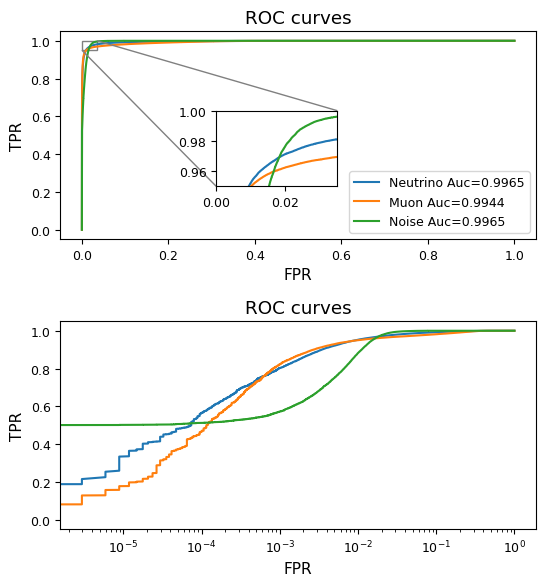

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, axs = plt.subplots(figsize=set_size('thesis'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Noise','Muons','Neutrinos'])
cm_display.plot(ax=axs)

for labels in cm_display.text_.ravel():
    labels.set_fontsize(9)
axs.set_ylabel('True')
axs.set_xlabel('Predicted')


#fig.savefig(outdir+ 'Confusion_matrix_Multiclass_MC.pdf', format='pdf', bbox_inches='tight')


fig, axs = plt.subplots(2,1,figsize=set_size('thesis',subplots=(2, 1),y_size=6))

axs[0].plot(fpr_neutrino, tpr_neutrino, label=f'Neutrino Auc={auc_neutrino:.4f}')
axs[0].plot(fpr_muon, tpr_muon, label=f'Muon Auc={auc_muon:.4f}')
axs[0].plot(fpr_noise, tpr_noise, label=f'Noise Auc={auc_noise:.4f}')


axins = zoomed_inset_axes(axs[0], zoom=8, loc='lower right',bbox_to_anchor=(350,400)) # zoom = 6
axins.plot(fpr_neutrino, tpr_neutrino, label=f'Neutrino Auc={auc_neutrino:.4f}')
axins.plot(fpr_muon, tpr_muon, label=f'Muon Auc={auc_muon:.4f}')
axins.plot(fpr_noise, tpr_noise, label=f'Noise Auc={auc_noise:.4f}')

axins.set_xlim(0,0.035)
axins.set_ylim(0.95,1)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
mark_inset(axs[0], axins, loc1=1, loc2=3, fc="none", ec="0.5")
#plt.setp(axins, xticks=[], yticks=[])

axs[0].set_xlabel('FPR')
axs[0].set_ylabel('TPR')
#axs[0].set_xscale('log')
axs[0].set_title('ROC curves')
axs[0].legend(loc='lower right')

axs[1].plot(fpr_neutrino, tpr_neutrino, label=f'Neutrino Auc={auc_neutrino:.4f}')
axs[1].plot(fpr_muon, tpr_muon, label=f'Muon Auc={auc_muon:.4f}')
axs[1].plot(fpr_noise, tpr_noise, label=f'Noise Auc={auc_noise:.4f}')
axs[1].set_xlabel('FPR')
axs[1].set_ylabel('TPR')
axs[1].set_xscale('log')
axs[1].set_title('ROC curves')
#axs[1].legend()

fig.tight_layout()
fig.savefig(outdir+ 'ROC_Curves_Multiclass_MC.png', format='png', bbox_inches='tight')

#fig.savefig(outdir + 'Roc_curves.png')

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


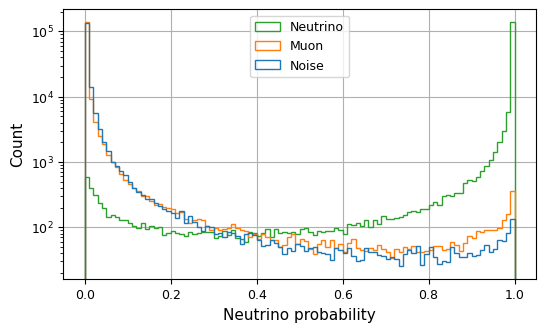

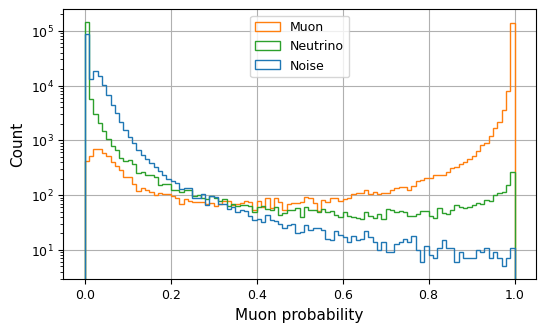

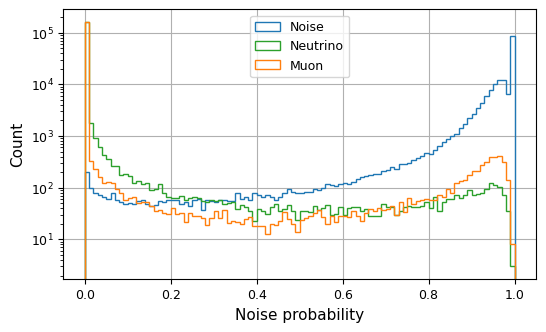

In [12]:
noise_mask = multiclass_equal_comparison['pid'].isin([-1,1])
muon_mask = multiclass_equal_comparison['pid'].isin([-13,13])
neutrino_mask = multiclass_equal_comparison['pid'].isin([-12,12,-14,14,-16,16])

bins_to_use = np.linspace(0,1,101)
print(bins_to_use)
fig, axs = plt.subplots(figsize=set_size('thesis'))

plot_neutrino = [multiclass_equal_comparison['pid_neutrino_pred'][noise_mask],multiclass_equal_comparison['pid_neutrino_pred'][muon_mask],multiclass_equal_comparison['pid_neutrino_pred'][neutrino_mask]]
axs.hist(plot_neutrino, bins_to_use, density=False, histtype='step',stacked=False,label=['Noise','Muon','Neutrino'],color=['C0','C1','C2'])

#axs.set_title('Test set results')
axs.set_xlabel('Neutrino probability')
axs.set_ylabel('Count')
axs.set_yscale('log')
axs.legend()
axs.grid()
#axs.set_ylim(bottom=1)
fig.tight_layout()
fig.savefig(outdir+ 'neutrino_prob_Multiclass_MC.png', format='png', bbox_inches='tight')


fig, axs = plt.subplots(figsize=set_size('thesis'))
plot_neutrino = [multiclass_equal_comparison['pid_muon_pred'][noise_mask],multiclass_equal_comparison['pid_muon_pred'][neutrino_mask],multiclass_equal_comparison['pid_muon_pred'][muon_mask]]
axs.hist(plot_neutrino, bins_to_use, density=False, histtype='step',stacked=False,label=['Noise','Neutrino','Muon'],color=['C0','C2','C1'])

#axs.set_title('Test set results')
axs.set_xlabel('Muon probability')
axs.set_ylabel('Count')
axs.set_yscale('log')
axs.legend()
#axs.set_ylim(bottom=1)
axs.grid()
fig.tight_layout()
fig.savefig(outdir+ 'muon_prob_Multiclass_MC.png', format='png', bbox_inches='tight')


fig, axs = plt.subplots(figsize=set_size('thesis'))
plot_neutrino = [multiclass_equal_comparison['pid_noise_pred'][muon_mask],multiclass_equal_comparison['pid_noise_pred'][neutrino_mask],multiclass_equal_comparison['pid_noise_pred'][noise_mask]]
axs.hist(plot_neutrino, bins_to_use, density=False, histtype='step',stacked=False,label=['Muon','Neutrino','Noise'],color=['C1','C2','C0'])

#axs.set_title('Test set results')
axs.set_xlabel('Noise probability')
axs.set_ylabel('Count')
axs.set_yscale('log')
axs.legend()
axs.grid()
#axs.set_ylim(bottom=1)

fig.tight_layout()
fig.savefig(outdir+ 'noise_prob_Multiclass_MC.png', format='png', bbox_inches='tight')


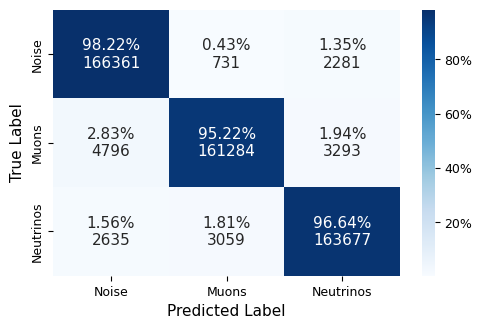

In [13]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, classes, ymap=None, figsize=(17,17)):
    tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
    }   

    plt.rcParams.update(tex_fonts)
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      classes:   aliases for the labels. String array to be shown in the cm plot.
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    #sns.set(font_scale=2.8)

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d' % (p, c)
            #elif c == 0:
            #    annot[i, j] = ''
            else:
                annot[i, j] = '%.2f%%\n%d' % (p, c)
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm = cm * 100
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    fig, ax = plt.subplots(figsize=figsize)
    plt.yticks(va='center')

    sns.heatmap(cm, annot=annot, fmt='', ax=ax, xticklabels=classes, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=classes, cmap="Blues")
    fig.savefig(outdir+ 'confusion_matrix_Multiclass_MC.png', format='png', bbox_inches='tight')
    #plt.savefig(filename,  bbox_inches='tight')

cm_analysis(truth, predictions,'confusion_matrix',[0,1,2],['Noise','Muons','Neutrinos'],figsize=set_size('thesis'))

   Unnamed: 0  energy_pred    event_no       energy
0           0    17.948006  21794140.0    14.685727
1           1    12.543299   6635665.0     9.670133
2           2    12.193014  24365311.0     6.789574
3           3    17.239094  11910373.0    10.895575
4           4   685.727966  12728493.0  1972.088840
9999.715384397996
1.0000007383530822


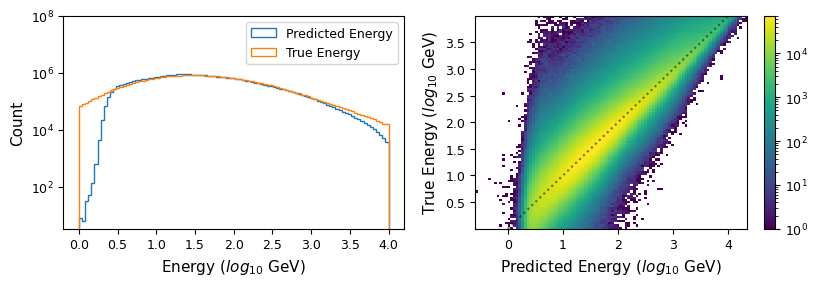

In [14]:
print(energy.head(5))
print(np.max(energy['energy']))
print(np.min(energy['energy']))
# fig, axs = plt.subplots(figsize=set_size('thesis'))

# hist = axs.hist((np.log10(energy['energy_pred'])-np.log10(energy['energy'])),bins=100,label='Energy Residual',alpha=0.5)
# #hist = axs.hist(np.log10(energy['energy']),bins=100,label='True Energy',alpha=0.5)
# axs.set_ylabel('count')
# axs.set_xlabel('Energy log10 GeV')
# axs.set_yscale('log')
# axs.set_xscale('log')
# axs.legend()
# fig.tight_layout()

fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_energy = np.linspace(0,4,100)
hist = axs[0].hist(np.log10(energy['energy_pred']),bins=bins_energy,label='Predicted Energy',alpha=1,histtype='step')
hist = axs[0].hist(np.log10(energy['energy']),bins=bins_energy,label='True Energy',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_yscale('log')
axs[0].set_ylim(top=10**8)
axs[0].legend()

hist = axs[1].hist2d(np.log10(energy['energy_pred']),np.log10(energy['energy']),bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True Energy ($log_{10}$ GeV)')
axs[1].set_xlabel(r'Predicted Energy ($log_{10}$ GeV)')
energy_line = np.linspace(0,4,100)
axs[1].plot(energy_line,energy_line,':',color='k',alpha=0.5)

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'Energy_result_MC.png', format='png', bbox_inches='tight')

# fig, axs = plt.subplots(figsize=set_size('thesis'))

# hist = axs.hist2d(np.log10(energy['energy_pred']),np.log10(energy['energy']),bins=100)
# axs.set_ylabel('True energy')
# axs.set_xlabel('Predicted energy')

# fig.colorbar(hist[3],ax=axs)
# fig.tight_layout()


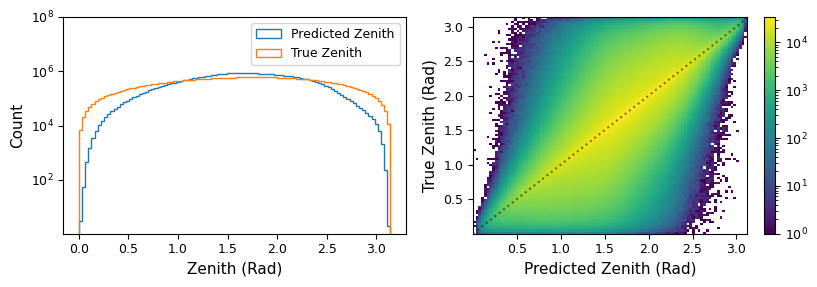

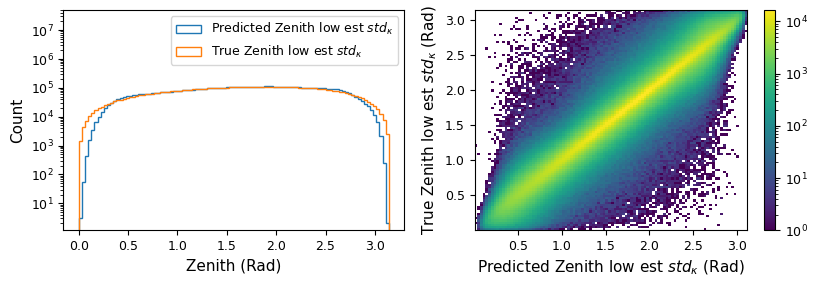

In [15]:
# fig, axs = plt.subplots(figsize=(5, 5))

# hist = axs.hist(zenith['zenith_pred'],bins=100,label='Predicted zenith',alpha=0.5)
# hist = axs.hist(zenith['zenith'],bins=100,label='True zenith',alpha=0.5)
# axs.set_ylabel('count')
# axs.set_xlabel('Zenith')
# axs.legend()
# fig.tight_layout()


# fig, axs = plt.subplots(figsize=(5, 5))

# kappa_cut = 0
# print('with a kappa of ', str(kappa_cut) , 'this percent of events are left:',np.sum([zenith['zenith_kappa']>=kappa_cut])/len(zenith*100))
# hist = axs.hist2d(zenith['zenith_pred'][zenith['zenith_kappa']>kappa_cut],zenith['zenith'][zenith['zenith_kappa']>kappa_cut],bins=100)

# axs.set_ylabel('True Zenith')
# axs.set_xlabel('Predicted Zenith')
# fig.colorbar(hist[3],ax=axs)
# fig.tight_layout()


# fig, axs = plt.subplots(figsize=(5, 5))

# kappa_cut = 20
# print('with a kappa of ', str(kappa_cut) , 'this percent of events are left:',np.sum([zenith['zenith_kappa']>=kappa_cut])/len(zenith*100))
# hist = axs.hist2d(zenith['zenith_pred'][zenith['zenith_kappa']>kappa_cut],zenith['zenith'][zenith['zenith_kappa']>kappa_cut],bins=100)

# axs.set_ylabel('True Zenith')
# axs.set_xlabel('Predicted Zenith')
# fig.colorbar(hist[3],ax=axs)
# fig.tight_layout()


# #fig.savefig(outdir + 'Zenith_pred_2d_hist.png')

kappa_cut = 20
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_zenith = np.linspace(0,np.pi,100)
hist = axs[0].hist(zenith['zenith_pred'],bins=bins_zenith,label='Predicted Zenith',alpha=1,histtype='step')
hist = axs[0].hist(zenith['zenith'],bins=bins_zenith,label='True Zenith',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Zenith (Rad)')
axs[0].set_yscale('log')
axs[0].set_ylim(top=10**8)
axs[0].legend()

hist = axs[1].hist2d(zenith['zenith_pred'],zenith['zenith'],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True Zenith (Rad)')
axs[1].set_xlabel(r'Predicted Zenith (Rad)')
zenith_line = np.linspace(0,np.pi,100)
axs[1].plot(zenith_line,zenith_line,':',color='k',alpha=0.5)

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'zenith_result_MC.png', format='png', bbox_inches='tight')


fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_zenith = np.linspace(0,np.pi,100)
hist = axs[0].hist(zenith['zenith_pred'][zenith['zenith_kappa']>kappa_cut],bins=bins_zenith,label=r'Predicted Zenith low est $std_{\kappa}$',alpha=1,histtype='step')
hist = axs[0].hist(zenith['zenith'][zenith['zenith_kappa']>kappa_cut],bins=bins_zenith,label=r'True Zenith low est $std_{\kappa}$',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Zenith (Rad)')
axs[0].set_yscale('log')
axs[0].set_ylim(top=5*10**7)
axs[0].legend()

hist = axs[1].hist2d(zenith['zenith_pred'][zenith['zenith_kappa']>kappa_cut],zenith['zenith'][zenith['zenith_kappa']>kappa_cut],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True Zenith low est $std_{\kappa}$ (Rad)')
axs[1].set_xlabel(r'Predicted Zenith low est $std_{\kappa}$ (Rad)')

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'zenith_result_kappa_cut_MC.png', format='png', bbox_inches='tight')

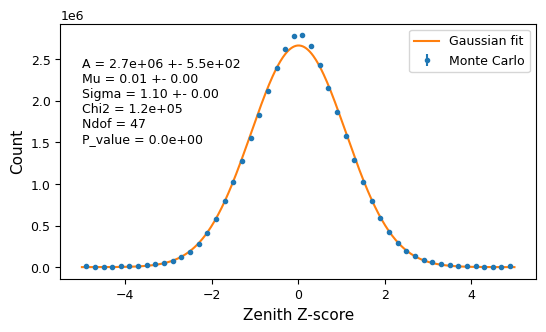

In [16]:
import scipy.stats as sci
from scipy.optimize import curve_fit

zenith_residuals = zenith['zenith_pred']-zenith['zenith']
zenith_z_score = zenith_residuals/(1/np.sqrt(zenith['zenith_kappa']))

bins_zenith = np.linspace(-5,5,51)
bins_zenith_middle = (bins_zenith[1:] + bins_zenith[:-1])/2

counts_zenith_z_score,_ = np.histogram(np.clip(zenith_z_score,-5,5),bins=bins_zenith)

sigma_zenith_z_score = np.sqrt(counts_zenith_z_score)


def gauss(x,A,mu,sigma):
    return A*np.exp(-(x - mu)**2/(2*sigma**2)) 

guess = [2.5*10**6,0,1]

par, C = curve_fit(gauss, bins_zenith_middle, ydata=counts_zenith_z_score, sigma=sigma_zenith_z_score, p0=guess, absolute_sigma=True) 
C = np.sqrt(np.diag(C))

fig, axs = plt.subplots(1,1,figsize=set_size('thesis'))



hist = axs.errorbar(bins_zenith_middle,counts_zenith_z_score,yerr=sigma_zenith_z_score,fmt='.',label='Monte Carlo')

x_plot = np.linspace(-5,5,500)
y_plot = gauss(x_plot,par[0],par[1],par[2])
axs.plot(x_plot,y_plot,label='Gaussian fit')

y = gauss(bins_zenith_middle,par[0],par[1],par[2])
chi2_zenith = np.sum((counts_zenith_z_score-y)**2/sigma_zenith_z_score**2)
ndof_zenith = len(counts_zenith_z_score)-len(par)
p_value_zenith = sci.chi2.sf(chi2_zenith,ndof_zenith)

string = "A = {:.1e} +- {:.1e}\nMu = {:.2f} +- {:.2f}\nSigma = {:.2f} +- {:.2f}\nChi2 = {:.1e}\nNdof = {:.0f}\nP_value = {:.1e}".format(par[0],C[0],par[1],C[1],par[2],C[2],chi2_zenith,ndof_zenith,p_value_zenith)
# string = "Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}".format()
axs.text(-5, 1.5*10**6, string,fontsize=9)



axs.set_ylabel('Count')
axs.set_xlabel('Zenith Z-score')
#axs.set_yscale('log')
#axs.set_ylim(top=5**8)
axs.legend()



fig.tight_layout()
fig.savefig(outdir+ 'PULL_zenith_result_MC.png', format='png', bbox_inches='tight')

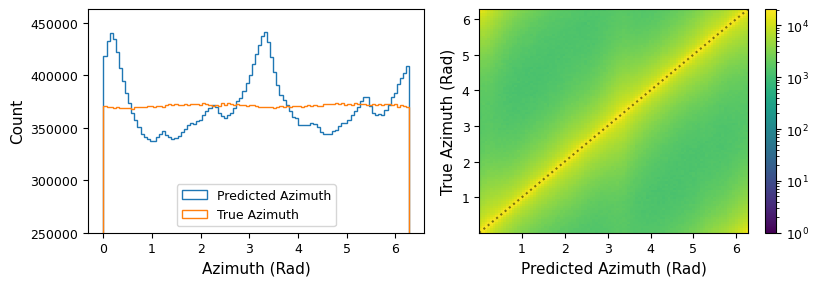

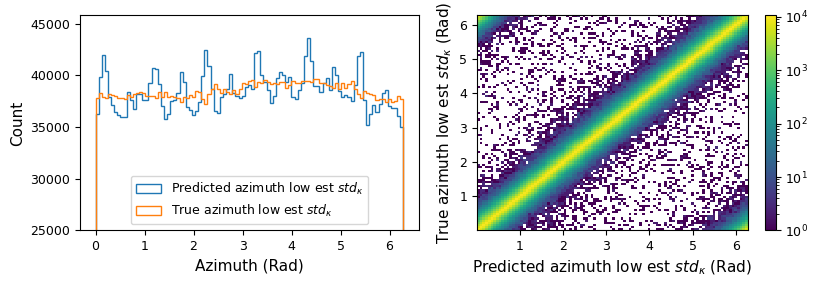

In [17]:
# fig, axs = plt.subplots(figsize=(5, 5))

# hist = axs.hist(azimuth['azimuth_pred'],bins=100,label='Predicted azimuth',alpha=0.5)
# hist = axs.hist(azimuth['azimuth'],bins=100,label='True azimuth',alpha=0.5)
# axs.set_ylabel('count')
# axs.set_xlabel('Azimuth')
# axs.legend()
# fig.tight_layout()


# fig, axs = plt.subplots(figsize=(5, 5))

# kappa_cut = 0
# print('with a kappa of ', str(kappa_cut) , 'this percent of events are left:',np.sum([azimuth['azimuth_kappa']>=kappa_cut])/len(azimuth*100))
# hist = axs.hist2d(azimuth['azimuth_pred'][azimuth['azimuth_kappa']>kappa_cut],azimuth['azimuth'][azimuth['azimuth_kappa']>kappa_cut],bins=100)

# axs.set_ylabel('True azimuth')
# axs.set_xlabel('Predicted azimuth')
# fig.colorbar(hist[3],ax=axs)
# fig.tight_layout()


# fig, axs = plt.subplots(figsize=(5, 5))

# kappa_cut = 20
# print('with a kappa of ', str(kappa_cut) , 'this percent of events are left:',np.sum([azimuth['azimuth_kappa']>=kappa_cut])/len(azimuth*100))
# hist = axs.hist2d(azimuth['azimuth_pred'][azimuth['azimuth_kappa']>kappa_cut],azimuth['azimuth'][azimuth['azimuth_kappa']>kappa_cut],bins=100)

# axs.set_ylabel('True azimuth')
# axs.set_xlabel('Predicted azimuth')
# fig.colorbar(hist[3],ax=axs)
# fig.tight_layout()




fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_azimuth = np.linspace(0,2*np.pi,100)
hist = axs[0].hist(azimuth['azimuth_pred'],bins=bins_azimuth,label='Predicted Azimuth',alpha=1,histtype='step')
hist = axs[0].hist(azimuth['azimuth'],bins=bins_azimuth,label='True Azimuth',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Azimuth (Rad)')
#axs[0].set_yscale('log')
axs[0].set_ylim(bottom=250000)
axs[0].legend(loc='lower center')

hist = axs[1].hist2d(azimuth['azimuth_pred'],azimuth['azimuth'],bins=100,norm = colors.LogNorm(vmin=1))
axs[1].set_ylabel(r'True Azimuth (Rad)')
axs[1].set_xlabel(r'Predicted Azimuth (Rad)')
zenith_line = np.linspace(0,2*np.pi,100)
axs[1].plot(zenith_line,zenith_line,':',color='k',alpha=0.5)

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'azimuth_result_MC.png', format='png', bbox_inches='tight')


fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_azimuth = np.linspace(0,2*np.pi,100)
hist = axs[0].hist(azimuth['azimuth_pred'][azimuth['azimuth_kappa']>kappa_cut],bins=bins_azimuth,label=r'Predicted azimuth low est $std_{\kappa}$',alpha=1,histtype='step')
hist = axs[0].hist(azimuth['azimuth'][azimuth['azimuth_kappa']>kappa_cut],bins=bins_azimuth,label=r'True azimuth low est $std_{\kappa}$',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Azimuth (Rad)')
#axs[0].set_yscale('log')
axs[0].set_ylim(bottom=25000)
axs[0].legend(loc='lower center')

hist = axs[1].hist2d(azimuth['azimuth_pred'][azimuth['azimuth_kappa']>kappa_cut],azimuth['azimuth'][azimuth['azimuth_kappa']>kappa_cut],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True azimuth low est $std_{\kappa}$ (Rad)')
axs[1].set_xlabel(r'Predicted azimuth low est $std_{\kappa}$ (Rad)')

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'azimuth_result_kappa_cut_MC.png', format='png', bbox_inches='tight')



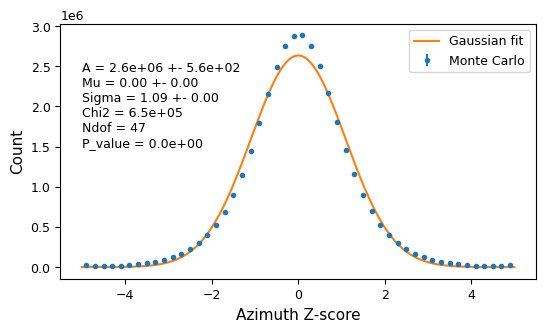

In [18]:
import scipy.stats as sci
from scipy.optimize import curve_fit

azimuth_residuals = azimuth['azimuth_pred']-azimuth['azimuth']
azimuth_residuals[azimuth_residuals<-np.pi] = 2*np.pi + azimuth_residuals[azimuth_residuals<-np.pi]
azimuth_residuals[azimuth_residuals>np.pi] = -2*np.pi + azimuth_residuals[azimuth_residuals>np.pi]

azimuth_z_score = azimuth_residuals/(1/np.sqrt(azimuth['azimuth_kappa']))

bins_azimuth = np.linspace(-5,5,51)
bins_azimuth_middle = (bins_azimuth[1:] + bins_azimuth[:-1])/2

counts_azimuth_z_score,_ = np.histogram(np.clip(azimuth_z_score,-5,5),bins=bins_azimuth)

sigma_azimuth_z_score = np.sqrt(counts_azimuth_z_score)


def gauss(x,A,mu,sigma):
    return A*np.exp(-(x - mu)**2/(2*sigma**2)) 

guess = [2.5*10**6,0,1]

par, C = curve_fit(gauss, bins_azimuth_middle, ydata=counts_azimuth_z_score, sigma=sigma_azimuth_z_score, p0=guess, absolute_sigma=True) 
C = np.sqrt(np.diag(C))

fig, axs = plt.subplots(1,1,figsize=set_size('thesis'))



hist = axs.errorbar(bins_azimuth_middle,counts_azimuth_z_score,yerr=sigma_azimuth_z_score,fmt='.',label='Monte Carlo')

x_plot = np.linspace(-5,5,500)
y_plot = gauss(x_plot,par[0],par[1],par[2])
axs.plot(x_plot,y_plot,label='Gaussian fit')

y = gauss(bins_azimuth_middle,par[0],par[1],par[2])
chi2_azimuth = np.sum((counts_azimuth_z_score-y)**2/sigma_azimuth_z_score**2)
ndof_azimuth = len(counts_azimuth_z_score)-len(par)
p_value_azimuth = sci.chi2.sf(chi2_azimuth,ndof_azimuth)

string = "A = {:.1e} +- {:.1e}\nMu = {:.2f} +- {:.2f}\nSigma = {:.2f} +- {:.2f}\nChi2 = {:.1e}\nNdof = {:.0f}\nP_value = {:.1e}".format(par[0],C[0],par[1],C[1],par[2],C[2],chi2_azimuth,ndof_azimuth,p_value_azimuth)
# string = "Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}".format()
axs.text(-5, 1.5*10**6, string,fontsize=9)



axs.set_ylabel('Count')
axs.set_xlabel('Azimuth Z-score')
#axs.set_yscale('log')
#axs.set_ylim(top=5**8)
axs.legend()



fig.tight_layout()
fig.savefig(outdir+ 'PULL_azimuth_result_MC.png', format='png', bbox_inches='tight')




In [19]:
track_cascade.head(5)
print(len(track_cascade[track_cascade['track_mu']==1]))
print(len(track_cascade[track_cascade['track_mu']==0]))

18054122
18690820


In [20]:
CC_neutrino_event_nos = MC_interaction_type['event_no'][MC_interaction_type['interaction_type']==1]
NC_neutrino_event_nos = MC_interaction_type['event_no'][MC_interaction_type['interaction_type']==2]

electron_CC_neutrinos = multiclass_electron_neutrinos['event_no'][multiclass_electron_neutrinos['event_no'].isin(CC_neutrino_event_nos.to_list())]
electron_NC_neutrinos = multiclass_electron_neutrinos['event_no'][multiclass_electron_neutrinos['event_no'].isin(NC_neutrino_event_nos.to_list())]
muon_CC_neutrinos = multiclass_muon_neutrinos['event_no'][multiclass_muon_neutrinos['event_no'].isin(CC_neutrino_event_nos.to_list())]
muon_NC_neutrinos = multiclass_muon_neutrinos['event_no'][multiclass_muon_neutrinos['event_no'].isin(NC_neutrino_event_nos.to_list())]
tau_CC_neutrinos = multiclass_tau_neutrinos['event_no'][multiclass_tau_neutrinos['event_no'].isin(CC_neutrino_event_nos.to_list())]
tau_NC_neutrinos = multiclass_tau_neutrinos['event_no'][multiclass_tau_neutrinos['event_no'].isin(NC_neutrino_event_nos.to_list())]


these are for all test events!


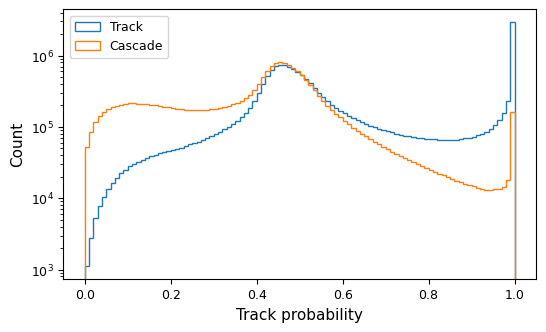

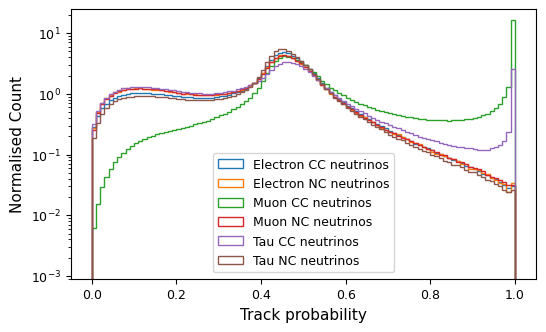

In [21]:
print('these are for all test events!')

fig, axs = plt.subplots(figsize=set_size('thesis'))
#print(track_cascade.head(10))
hist = axs.hist(track_cascade['track_mu_pred'][track_cascade['track_mu'] == 1],bins=100,alpha=1,label='Track',histtype='step')
hist = axs.hist(track_cascade['track_mu_pred'][track_cascade['track_mu'] == 0],bins=100,alpha=1,label='Cascade',histtype='step')

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Track probability')
axs.legend(loc='upper left')

fig.tight_layout()

fig, axs = plt.subplots(figsize=set_size('thesis'))
#print(track_cascade.head(10))
hist = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(electron_CC_neutrinos.to_list())],bins=100,alpha=1,label='Electron CC neutrinos',histtype='step',density=True)
hist = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(electron_NC_neutrinos.to_list())],bins=100,alpha=1,label='Electron NC neutrinos',histtype='step',density=True)
hist = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(muon_CC_neutrinos.to_list())],bins=100,alpha=1,label='Muon CC neutrinos',histtype='step',density=True)
hist = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(muon_NC_neutrinos.to_list())],bins=100,alpha=1,label='Muon NC neutrinos',histtype='step',density=True)
hist_tau_CC = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(tau_CC_neutrinos.to_list())],bins=100,alpha=1,label='Tau CC neutrinos',histtype='step',density=True)
hist = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(tau_NC_neutrinos.to_list())],bins=100,alpha=1,label='Tau NC neutrinos',histtype='step',density=True)

axs.set_yscale('log')
axs.set_ylim(bottom=0.9*10**-3)
axs.set_ylabel('Normalised Count')
axs.set_xlabel('Track probability')
axs.legend(loc='lower center')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results/"
fig.savefig(outdir + 'track_probability_MC_each_type.png',bbox_inches='tight')

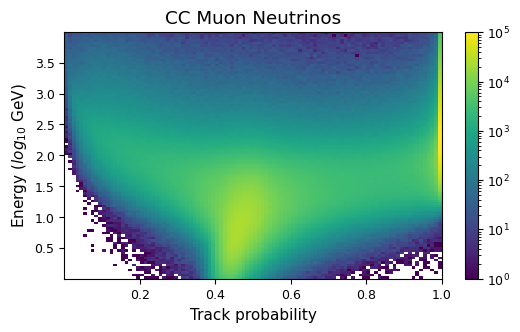

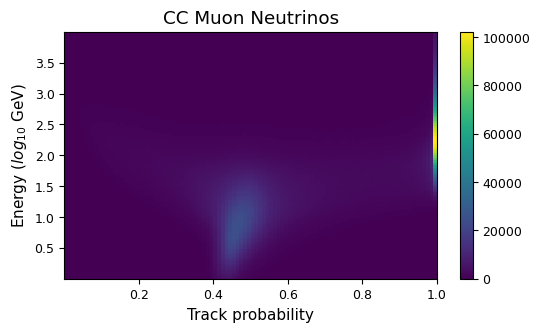

In [22]:
fig, axs = plt.subplots(figsize=set_size('thesis'))

hist = axs.hist2d(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(muon_CC_neutrinos.to_list())],np.log10(energy['energy'][energy['event_no'].isin(muon_CC_neutrinos.to_list())]),bins=100,norm = colors.LogNorm())
axs.set_xlabel(r'Track probability')
axs.set_ylabel(r'Energy ($log_{10}$ GeV)')
axs.set_title(r'CC Muon Neutrinos')

fig.colorbar(hist[3],ax=axs)
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results/"
fig.savefig(outdir + 'track_probability_muon_neutrino_vs_energy.png',bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis'))

hist = axs.hist2d(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(muon_CC_neutrinos.to_list())],np.log10(energy['energy'][energy['event_no'].isin(muon_CC_neutrinos.to_list())]),bins=100)
axs.set_xlabel(r'Track probability')
axs.set_ylabel(r'Energy ($log_{10}$ GeV)')
axs.set_title(r'CC Muon Neutrinos')

fig.colorbar(hist[3],ax=axs)
fig.tight_layout()

In [28]:
counts_tau_CC,_,_ = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(tau_CC_neutrinos.to_list())],bins=100,alpha=1,label='Tau CC neutrinos',histtype='step',density=True)
counts_tau_NC,_,_ = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(tau_NC_neutrinos.to_list())],bins=100,alpha=1,label='Tau CC neutrinos',histtype='step',density=True)
counts_mu_CC,_,_ = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(muon_CC_neutrinos.to_list())],bins=100,alpha=1,label='Tau CC neutrinos',histtype='step',density=True)
counts_mu_NC,_,_ = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(muon_NC_neutrinos.to_list())],bins=100,alpha=1,label='Tau CC neutrinos',histtype='step',density=True)


In [38]:
print(counts_tau_CC[-1])
print(counts_tau_NC[-1])
print(counts_mu_CC[-1])
print(counts_mu_NC[-1])

2.5166140222017988
0.025741751359631547
16.485449641279896
0.03193372373817177


In [39]:
print(counts_tau_CC[-1]/counts_tau_NC[-1])
print(counts_mu_CC[-1]/counts_mu_NC[-1])

97.76390063919179
516.2395020526253


In [42]:
print((counts_tau_CC[-1]/counts_tau_NC[-1])/(counts_mu_CC[-1]/counts_mu_NC[-1]))
print((counts_tau_CC[-1]/counts_mu_CC[-1]))

0.18937702413409224
0.15265668070709743


In [41]:
print(np.sum(counts_tau_CC[-10:])/np.sum(counts_tau_CC[:]))
print(np.sum(counts_tau_NC[-10:])/np.sum(counts_tau_NC[:]))

0.03799341540317582
0.003532507448562694


In [25]:
print('Now for a Track/cascade test set, which has equal types!')
print(len(electron_CC_neutrinos))
print(len(electron_NC_neutrinos))
print(len(muon_CC_neutrinos))
print(len(muon_NC_neutrinos))
print(len(tau_CC_neutrinos))
print(len(tau_NC_neutrinos))
equal_track_cascade_selection_for_test_event_nos = []
equal_track_cascade_selection_for_test_event_nos.extend(electron_CC_neutrinos.sample(822502).to_list())
equal_track_cascade_selection_for_test_event_nos.extend(electron_CC_neutrinos.sample(822502).to_list())
equal_track_cascade_selection_for_test_event_nos.extend(muon_NC_neutrinos.sample(822502).to_list())
equal_track_cascade_selection_for_test_event_nos.extend(muon_CC_neutrinos.sample(int(5*822502)).to_list())
equal_track_cascade_selection_for_test_event_nos.extend(tau_CC_neutrinos.sample(822502).to_list())
equal_track_cascade_selection_for_test_event_nos.extend(tau_NC_neutrinos.sample(822502).to_list())
print(len(equal_track_cascade_selection_for_test_event_nos))
equal_track_cascade = track_cascade[track_cascade['event_no'].isin(equal_track_cascade_selection_for_test_event_nos)]
print(np.sum(equal_track_cascade['track_mu']))

Now for a Track/cascade test set, which has equal types!
7292953
822502
18054122
1869497
6375789
2326959
8225020
4112510


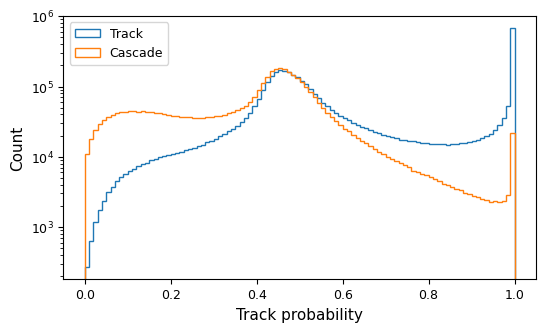

In [26]:

fig, axs = plt.subplots(figsize=set_size('thesis'))
#print(track_cascade.head(10))
hist = axs.hist(equal_track_cascade['track_mu_pred'][equal_track_cascade['track_mu'] == 1],bins=100,alpha=1,label='Track',histtype='step')
hist = axs.hist(equal_track_cascade['track_mu_pred'][equal_track_cascade['track_mu'] == 0],bins=100,alpha=1,label='Cascade',histtype='step')

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Track probability')
axs.legend(loc='upper left')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results/"
fig.savefig(outdir + 'track_probability_MC_equal.png',bbox_inches='tight')

In [27]:
#print(results.head(10))
#Noise = 0, muon =1, Neutrino=2
#pid_transform = {1:0,12:2,13:1,14:2,16:2}

predictions = []
truth = equal_track_cascade['track_mu'].values

number = len(equal_track_cascade)

for i in range(number):# range(len(results)):
    track_pred = equal_track_cascade['track_mu_pred'].values[i]
    pred = 0
    if track_pred > 0.5:
        pred = 1
    predictions.append(pred)




confusion_matrix_track = metrics.confusion_matrix(truth, predictions)

fpr_track, tpr_track , _ = metrics.roc_curve(truth,equal_track_cascade['track_mu_pred'].values,pos_label=1)

auc_track = metrics.auc(fpr_track, tpr_track)



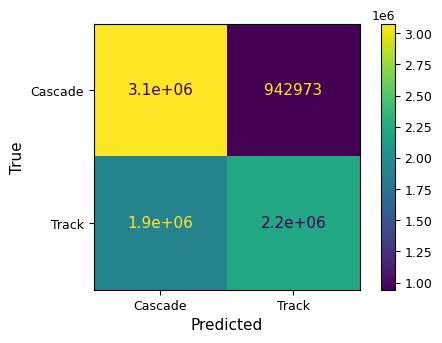

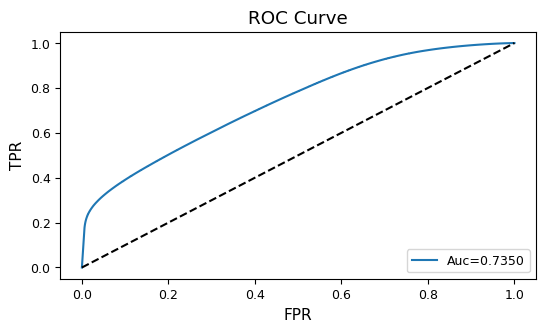

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, axs = plt.subplots(figsize=set_size('thesis'))
cm_display_track = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_track, display_labels = ['Cascade','Track'])
cm_display_track.plot(ax=axs)

for labels in cm_display.text_.ravel():
    labels.set_fontsize(9)
axs.set_ylabel('True')
axs.set_xlabel('Predicted')


#fig.savefig(outdir+ 'Confusion_matrix_Multiclass_MC.pdf', format='pdf', bbox_inches='tight')


fig, axs = plt.subplots(1,1,figsize=set_size('thesis'))

axs.plot(fpr_track, tpr_track, label=f'Auc={auc_track:.4f}')
axs.plot(np.linspace(0,1,100),np.linspace(0,1,100),linestyle='dashed',color='k')

axs.set_xlabel('FPR')
axs.set_ylabel('TPR')
#axs.set_xscale('log')
axs.set_title('ROC Curve')
axs.legend(loc='lower right')



fig.tight_layout()
fig.savefig(outdir+ 'ROC_Curves_track_cascade_MC.png', format='png', bbox_inches='tight')

#fig.savefig(outdir + 'Roc_curves.png')

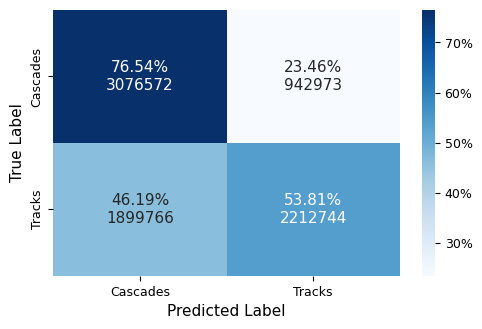

In [29]:
def cm_analysis(y_true, y_pred, filename, labels, classes, ymap=None, figsize=(17,17)):
    tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
    }   

    plt.rcParams.update(tex_fonts)
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      classes:   aliases for the labels. String array to be shown in the cm plot.
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    #sns.set(font_scale=2.8)

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d' % (p, c)
            #elif c == 0:
            #    annot[i, j] = ''
            else:
                annot[i, j] = '%.2f%%\n%d' % (p, c)
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm = cm * 100
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    fig, ax = plt.subplots(figsize=figsize)
    plt.yticks(va='center')

    sns.heatmap(cm, annot=annot, fmt='', ax=ax, xticklabels=classes, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=classes, cmap="Blues")
    fig.savefig(outdir+ 'confusion_matrix_track_cascade_MC.png', format='png', bbox_inches='tight')
    #plt.savefig(filename,  bbox_inches='tight')

cm_analysis(truth, predictions,'confusion_matrix',[0,1],['Cascades','Tracks'],figsize=set_size('thesis'))

In [30]:
# def logit(dataset,var):
    
#     dataset['logit_'+var] = np.log(dataset[var]*0.9999+0.00001 - np.log(1-dataset[var]*0.9999+0.00001))

In [31]:
# logit(track_cascade,'track_mu_pred')

In [32]:
# fig, axs = plt.subplots(figsize=(5, 5))

# hist = axs.hist(track_cascade['logit_track_mu_pred'][track_cascade['track_mu'] == 1],bins=100,alpha=0.5)
# hist = axs.hist(track_cascade['logit_track_mu_pred'][track_cascade['track_mu'] == 0],bins=100,alpha=0.5)

# axs.set_yscale('log')
# axs.set_ylabel('Count')
# axs.set_xlabel('Track probability')

# fig.tight_layout()

In [33]:
track_selection = track_cascade['event_no'][track_cascade['track_mu_pred'] > 0.9]
print(len(track_selection))

4298000


In [34]:
zenith_residual = zenith['zenith_pred'] - zenith['zenith']
azimuth_residual = azimuth['azimuth_pred'] - azimuth['azimuth']
azimuth_residual[azimuth_residual>np.pi] = azimuth_residual[azimuth_residual>np.pi] - np.pi
azimuth_residual[azimuth_residual<-np.pi] = azimuth_residual[azimuth_residual<-np.pi] + np.pi
energy_residual = np.log(energy['energy_pred']) - np.log(energy['energy'])

zenith['residual'] = zenith_residual
azimuth['residual'] = azimuth_residual
energy['residual'] = energy_residual


In [35]:
print(max(zenith_residual))
print(min(zenith_residual))
print(max(azimuth_residual))
print(min(azimuth_residual))
print(max(energy_residual))
print(min(energy_residual))

2.727357884578899
-2.637357952433108
3.141592426804751
-3.1415916170453677
5.227444094078198
-7.812602900991173


notice that these are scaled. There are only about  4298000 of the tracks


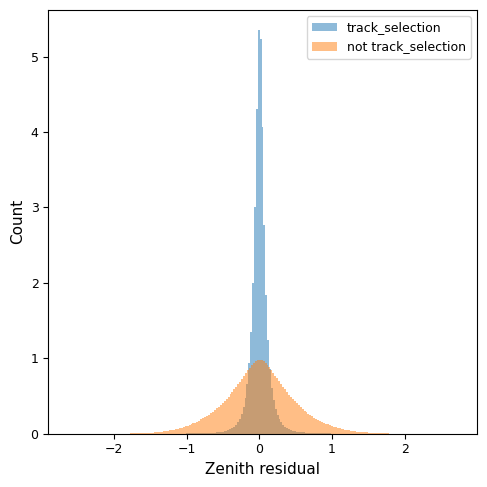

In [36]:
fig, axs = plt.subplots(figsize=(5, 5))

hist = axs.hist(zenith_residual[zenith['event_no'].isin(track_selection)],bins=200,alpha=0.5,density=True,label='track_selection')
hist = axs.hist(zenith_residual[~zenith['event_no'].isin(track_selection)],bins=200,alpha=0.5,density=True,label='not track_selection')
print('notice that these are scaled. There are only about ',len(track_selection), 'of the tracks')
#axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Zenith residual')
axs.legend()

fig.tight_layout()

notice that these are scaled. There are only about  4298000 of the tracks


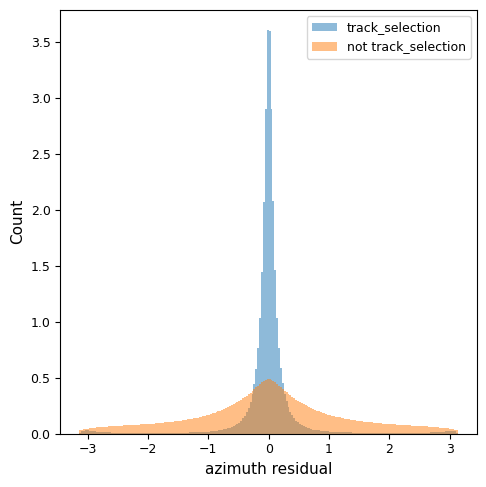

In [37]:
fig, axs = plt.subplots(figsize=(5, 5))

hist = axs.hist(azimuth_residual[azimuth['event_no'].isin(track_selection)],bins=200,alpha=0.5,density=True,label='track_selection')
hist = axs.hist(azimuth_residual[~azimuth['event_no'].isin(track_selection)],bins=200,alpha=0.5,density=True,label='not track_selection')
print('notice that these are scaled. There are only about ',len(track_selection), 'of the tracks')
#axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('azimuth residual')
axs.legend()

fig.tight_layout()

notice that these are scaled. There are only about  4298000 of the tracks


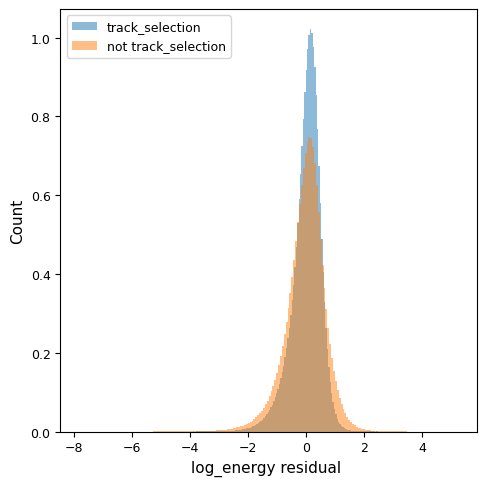

In [38]:
fig, axs = plt.subplots(figsize=(5, 5))

hist = axs.hist(energy_residual[energy['event_no'].isin(track_selection)],bins=200,alpha=0.5,density=True,label='track_selection')
hist = axs.hist(energy_residual[~energy['event_no'].isin(track_selection)],bins=200,alpha=0.5,density=True,label='not track_selection')
print('notice that these are scaled. There are only about ',len(track_selection), 'of the tracks')
#axs.set_xscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('log_energy residual ')
#axs.set_xlim(-60,60)
axs.legend()

fig.tight_layout()

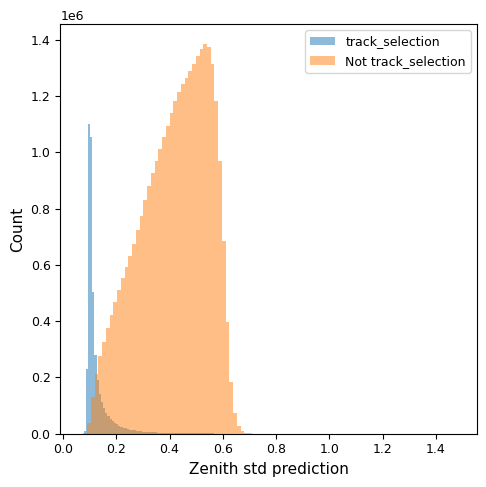

In [39]:

fig, axs = plt.subplots(figsize=(5, 5))

hist = axs.hist(1/np.sqrt(zenith['zenith_kappa'][zenith['event_no'].isin(track_selection)]),bins=100,label='track_selection',alpha=0.5)
hist = axs.hist(1/np.sqrt(zenith['zenith_kappa'][~zenith['event_no'].isin(track_selection)]),bins=100,label='Not track_selection',alpha=0.5)

axs.set_ylabel('Count')
axs.set_xlabel('Zenith std prediction')
axs.legend()

fig.tight_layout()


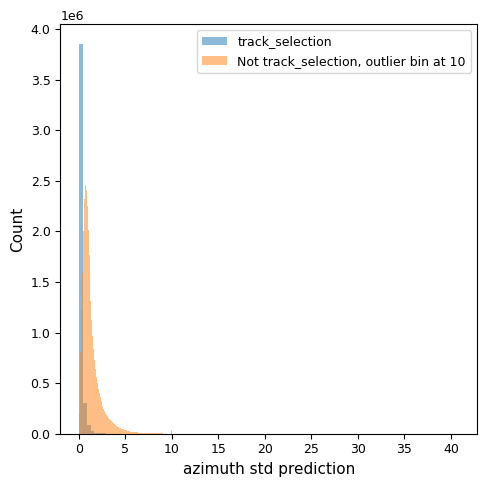

In [40]:
fig, axs = plt.subplots(figsize=(5, 5))

hist = axs.hist(1/np.sqrt(azimuth['azimuth_kappa'][azimuth['event_no'].isin(track_selection)]),bins=100,label='track_selection',alpha=0.5)
hist = axs.hist(np.clip(1/np.sqrt(azimuth['azimuth_kappa'][~azimuth['event_no'].isin(track_selection)]),0,10),bins=100,label='Not track_selection, outlier bin at 10',alpha=0.5)

axs.set_ylabel('Count')
axs.set_xlabel('azimuth std prediction')
axs.legend()

fig.tight_layout()

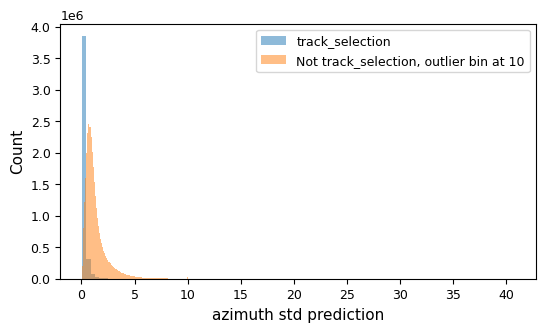

In [41]:

from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

fig, axs = plt.subplots(figsize=set_size('thesis'))

hist = axs.hist(1/np.sqrt(azimuth['azimuth_kappa'][azimuth['event_no'].isin(track_selection)]),bins=100,label='track_selection',alpha=0.5,color='C0')
hist = axs.hist(np.clip(1/np.sqrt(azimuth['azimuth_kappa'][~azimuth['event_no'].isin(track_selection)]),0,10),bins=100,label='Not track_selection, outlier bin at 10',alpha=0.5,color='C1')

axs.set_ylabel('Count')
axs.set_xlabel('azimuth std prediction')
#axs.set_yscale('log')
axs.legend()

fig.tight_layout()

#fig.savefig('example_1.png', format='png', bbox_inches='tight')

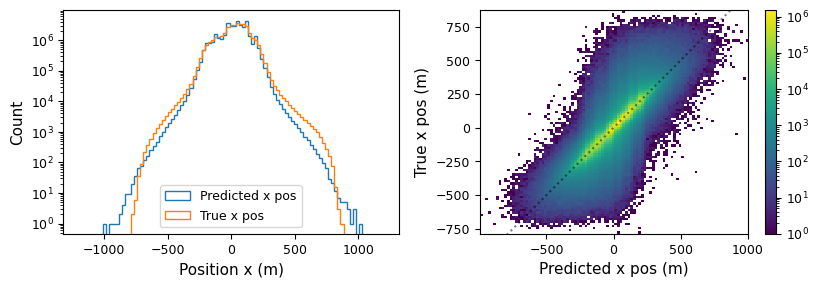

In [62]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-1200,1200,100)
hist = axs[0].hist(position['position_x_pred'],bins=bins_position,label='Predicted x pos',alpha=1,histtype='step')
hist = axs[0].hist(position['position_x'],bins=bins_position,label='True x pos',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position x (m)')
axs[0].set_yscale('log')
#axs[0].set_ylim(top=10**8)
axs[0].legend()

hist = axs[1].hist2d(position['position_x_pred'],position['position_x'],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True x pos (m)')
axs[1].set_xlabel(r'Predicted x pos (m)')
zenith_line = np.linspace(-1000,1000,100)
axs[1].plot(zenith_line,zenith_line,':',color='k',alpha=0.5)

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'position_x_result_MC.png', format='png', bbox_inches='tight')

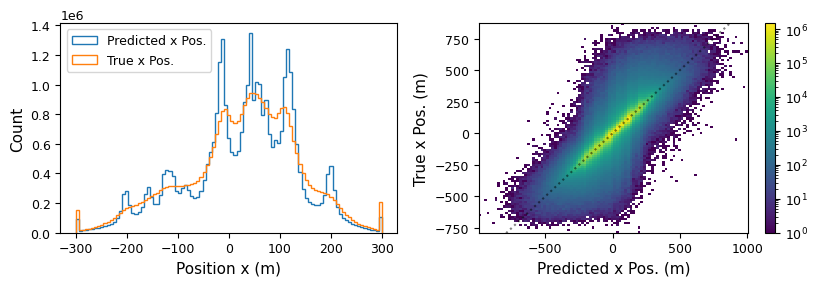

In [63]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-300,300,100)
hist = axs[0].hist(np.clip(position['position_x_pred'],-300,300),bins=bins_position,label='Predicted x Pos.',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(position['position_x'],-300,300),bins=bins_position,label='True x Pos.',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position x (m)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(top=10**8)
axs[0].legend()

hist = axs[1].hist2d(position['position_x_pred'],position['position_x'],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True x Pos. (m)')
axs[1].set_xlabel(r'Predicted x Pos. (m)')
zenith_line = np.linspace(-1000,1000,100)
axs[1].plot(zenith_line,zenith_line,':',color='k',alpha=0.5)

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'position_x_result_MC_not_log.png', format='png', bbox_inches='tight')

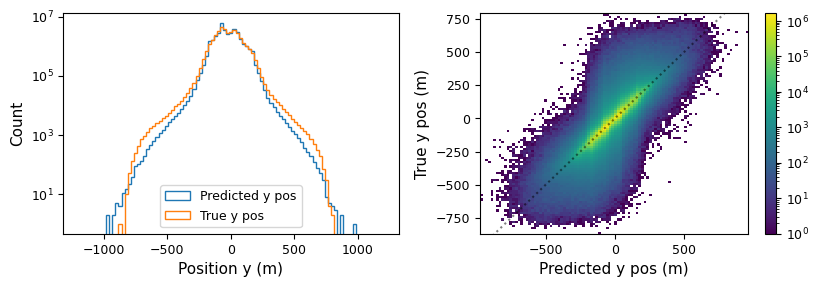

In [64]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-1200,1200,100)
hist = axs[0].hist(position['position_y_pred'],bins=bins_position,label='Predicted y pos',alpha=1,histtype='step')
hist = axs[0].hist(position['position_y'],bins=bins_position,label='True y pos',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position y (m)')
axs[0].set_yscale('log')
#axs[0].set_ylim(top=10**8)
axs[0].legend()

hist = axs[1].hist2d(position['position_y_pred'],position['position_y'],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True y pos (m)')
axs[1].set_xlabel(r'Predicted y pos (m)')
zenith_line = np.linspace(-1000,1000,100)
axs[1].plot(zenith_line,zenith_line,':',color='k',alpha=0.5)

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'position_y_result_MC.png', format='png', bbox_inches='tight')

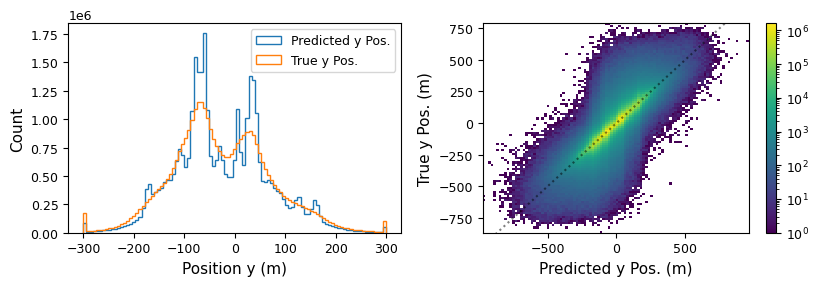

In [65]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-300,300,100)
hist = axs[0].hist(np.clip(position['position_y_pred'],-300,300),bins=bins_position,label='Predicted y Pos.',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(position['position_y'],-300,300),bins=bins_position,label='True y Pos.',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position y (m)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(top=10**8)
axs[0].legend()

hist = axs[1].hist2d(position['position_y_pred'],position['position_y'],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True y Pos. (m)')
axs[1].set_xlabel(r'Predicted y Pos. (m)')
zenith_line = np.linspace(-1000,1000,100)
axs[1].plot(zenith_line,zenith_line,':',color='k',alpha=0.5)

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'position_y_result_MC_not_log.png', format='png', bbox_inches='tight')

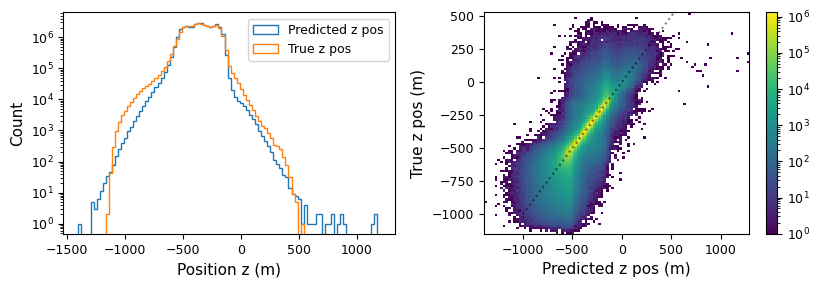

In [66]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-1400,1200,100)
hist = axs[0].hist(position['position_z_pred'],bins=bins_position,label='Predicted z pos',alpha=1,histtype='step')
hist = axs[0].hist(position['position_z'],bins=bins_position,label='True z pos',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position z (m)')
axs[0].set_yscale('log')
#axs[0].set_ylim(top=10**8)
axs[0].legend()

hist = axs[1].hist2d(position['position_z_pred'],position['position_z'],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True z pos (m)')
axs[1].set_xlabel(r'Predicted z pos (m)')
zenith_line = np.linspace(-1000,1000,100)
axs[1].plot(zenith_line,zenith_line,':',color='k',alpha=0.5)
fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'position_z_result_MC.png', format='png', bbox_inches='tight')

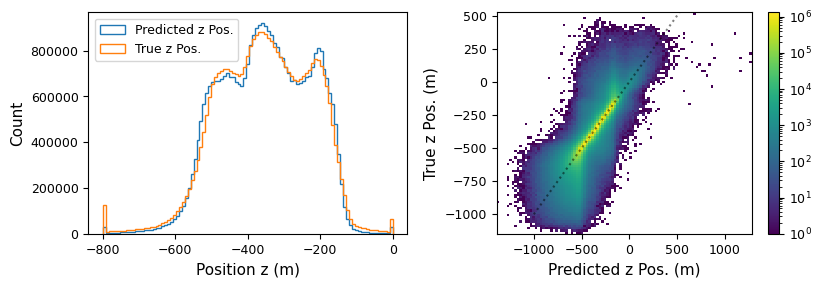

In [67]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
bins_position = np.linspace(-800,0,100)
hist = axs[0].hist(np.clip(position['position_z_pred'],-800,0),bins=bins_position,label='Predicted z Pos.',alpha=1,histtype='step')
hist = axs[0].hist(np.clip(position['position_z'],-800,0),bins=bins_position,label='True z Pos.',alpha=1,histtype='step')
axs[0].set_ylabel('Count')
axs[0].set_xlabel(r'Position z (m)')
#axs[0].set_yscale('log')
#axs[0].set_ylim(top=10**8)
axs[0].legend()

hist = axs[1].hist2d(position['position_z_pred'],position['position_z'],bins=100,norm = colors.LogNorm())
axs[1].set_ylabel(r'True z Pos. (m)')
axs[1].set_xlabel(r'Predicted z Pos. (m)')
zenith_line = np.linspace(-1000,1000,100)
axs[1].plot(zenith_line,zenith_line,':',color='k',alpha=0.5)

fig.colorbar(hist[3],ax=axs[1])
fig.tight_layout()
fig.savefig(outdir+ 'position_z_result_MC_not_log.png', format='png', bbox_inches='tight')